# 1. Análisis de tendencias de ventas

**Objetivo:**

Cargar, procesar y analizar un conjunto de datos de ventas, obteniendo insights clave como productos más vendidos, tendencias mensuales y análisis de clientes.

**Pasos:**

- Importar un dataset de ventas en formato CSV.
- Limpiar y transformar los datos eliminando valores nulos y estandarizando formatos.
- Realizar un análisis exploratorio (EDA) para detectar patrones y tendencias.
- Visualizar los resultados usando matplotlib o seaborn.

**Mejores prácticas:**

- Usa nombres de variables y funciones descriptivas.
- Aplica el principio DRY (Don't Repeat Yourself) modularizando el código en funciones.
- Documenta cada paso del análisis y las transformaciones.


## Preliminares

- Cargar las librerias necesarias

In [3]:
# Cargar las librerias necesarias


from utils import *


## Carga del dataset

Para este ejercicio vamos a utilizar las información de la [Venta de finca raiz en el estado de Connecticut entre el 2001 y el 2018 ](https://catalog.data.gov/dataset/real-estate-sales-2001-2018)

-   Cargar el dataset con pandas
-   Validar el tipo de datos para cada una de las columnas 

In [4]:
# Cargar el dataset con pandas
url = "https://data.ct.gov/api/views/5mzw-sjtu/rows.csv"
dataset = cargar_dataset(url)
dataset

/home/danielcardenas/MAD/MAD/Repasos/utils.py:22: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, sep=',')


Dataset cargado exitosamente: 1097629 filas, 14 columnas


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1097625,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1097626,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
1097627,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [3]:
display( dataset.info(), dataset.describe()) # obteniendo la información basica del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


None

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06
mean,5.370357e+05,2.011218e+03,2.818016e+05,4.053146e+05,9.603926e+00
std,7.526074e+06,6.773485e+00,1.657890e+06,5.143492e+06,1.801664e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.071300e+04,2.005000e+03,8.909000e+04,1.450000e+05,4.778667e-01
50%,8.070600e+04,2.011000e+03,1.405800e+05,2.330000e+05,6.105663e-01
75%,1.703410e+05,2.018000e+03,2.282700e+05,3.750000e+05,7.707200e-01
max,2.000500e+09,2.022000e+03,8.815100e+08,5.000000e+09,1.226420e+06


## Limpieza de Datos

- Eliminar y/o reemplazar valores nulos o faltantes
- Eliminar duplicados
- Transformar tipos de datos

In [4]:
# Valores nulos o faltantes

print(dataset.isnull().sum())

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64


In [5]:
dataset_clean = dataset.copy() # Crear una copia del dataset original

dataset_clean.fillna(0,inplace=True) # Reemplazar los ``NaN`` por '0' 

dataset_clean = dataset_clean[dataset_clean['Date Recorded'].apply(str) != '0' ]

dataset_clean.info() # Mostrar los resultados


<class 'pandas.core.frame.DataFrame'>
Index: 1097627 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097627 non-null  int64  
 1   List Year         1097627 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097627 non-null  object 
 4   Address           1097627 non-null  object 
 5   Assessed Value    1097627 non-null  float64
 6   Sale Amount       1097627 non-null  float64
 7   Sales Ratio       1097627 non-null  float64
 8   Property Type     1097627 non-null  object 
 9   Residential Type  1097627 non-null  object 
 10  Non Use Code      1097627 non-null  object 
 11  Assessor Remarks  1097627 non-null  object 
 12  OPM remarks       1097627 non-null  object 
 13  Location          1097627 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 125.6+ MB


Validar los datos duplicados, se identifica que el dataset tiene un identificador por cada uno de los inmuebles ``Serial Number``, cada linea corresponde a una tranacción en un determinado momento.

In [6]:
# Validar datos duplicados.

duplicados = dataset_clean.duplicated(subset='Serial Number')

print(f'Total Duplicados: {duplicados.sum()}')

Total Duplicados: 1001408


Ahora es necesario cambiar el tipo de datos de algunas columnas

In [6]:
# cambio de tipo dtype

dataset_clean['Date Recorded'] = pd.to_datetime(dataset_clean['Date Recorded'],format='%m/%d/%Y', errors='coerce')
dataset_clean['List Year'] = pd.to_datetime(dataset_clean['List Year'], format= '%Y',errors='coerce')
dataset_clean['Serial Number'] = dataset_clean['Serial Number'].dtype

dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097627 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1097627 non-null  object        
 1   List Year         1097627 non-null  datetime64[ns]
 2   Date Recorded     1097627 non-null  datetime64[ns]
 3   Town              1097627 non-null  object        
 4   Address           1097627 non-null  object        
 5   Assessed Value    1097627 non-null  float64       
 6   Sale Amount       1097627 non-null  float64       
 7   Sales Ratio       1097627 non-null  float64       
 8   Property Type     1097627 non-null  object        
 9   Residential Type  1097627 non-null  object        
 10  Non Use Code      1097627 non-null  object        
 11  Assessor Remarks  1097627 non-null  object        
 12  OPM remarks       1097627 non-null  object        
 13  Location          1097627 non-null  object     

In [7]:
Columnas_n = ['Sale Amount','Assessed Value','Sales Ratio']

dataset_clean[Columnas_n].describe()

,Sale Amount,Assessed Value,Sales Ratio
count,1.097627e+06,1.097627e+06,1.097627e+06
mean,4.053153e+05,2.818021e+05,9.603944e+00
std,5.143497e+06,1.657892e+06,1.801666e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.450000e+05,8.909000e+04,4.778667e-01
50%,2.330000e+05,1.405800e+05,6.105672e-01
75%,3.750000e+05,2.282700e+05,7.707200e-01
max,5.000000e+09,8.815100e+08,1.226420e+06


In [8]:
dataset_clean['Year'] = dataset_clean['Date Recorded'].dt.year
dataset_clean.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Year
0,int64,2022-01-01,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,0,0,0,POINT (-72.343628962 41.728431984),2023
1,int64,2020-01-01,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,0,0,0,0,0,2021
2,int64,2020-01-01,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,0,0,0,0,2020
3,int64,2021-01-01,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,0,0,0,POINT (-72.846365959 41.781677018),2022
4,int64,2020-01-01,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,0,0,0,0,2021


## Analisis exploratorio de datos.

- Distribución de ventas por pueblo `Town`

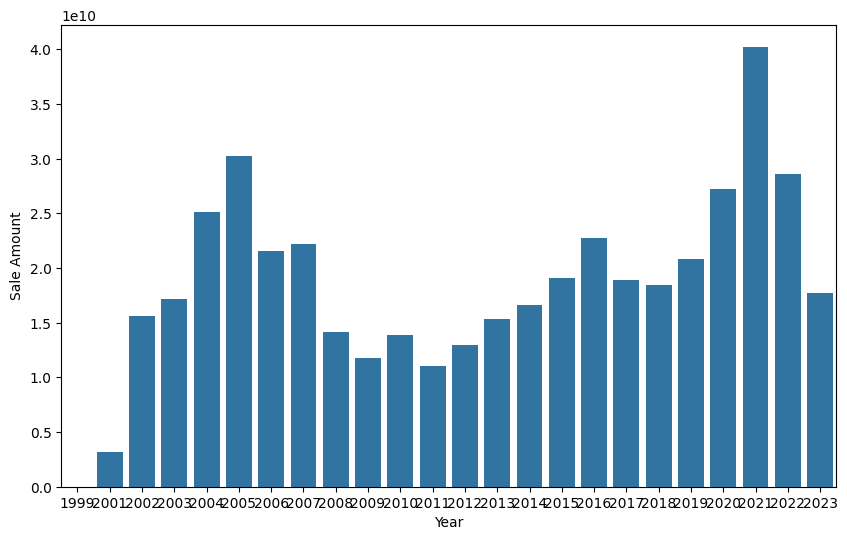

In [19]:
from utils import *

ventas_anio = dataset_clean.groupby('Year')['Sale Amount'].sum()

plt.figure(figsize=(10,6))
sns.barplot (x=ventas_anio.index,y = ventas_anio)
plt.show()